# <center> Machine Learning Programming Exercise 5:</center>
# <center> <ins>Supervised classification </ins></center>

| <font size=6,font color='red'>Monôme / binôme</font> | <font size=6,font color='red'>Noms</font> | <font size=6,font color='red'>Prénoms</font>   |
|:-------------:     |:-----------   |:------  |
| binôme 1  | <span style="color:red">HENAFF</span> | <span style="color:red">Félix</span>     |
| binôme 2         | <span style="color:red">DEDUYER</span> | <span style="color:red">Alfred</span>     |


## 1. Objectifs


Nous allons dans ce TP classer automatiquement des patchs extraits d'images sonar (cf. figure ci-dessous) en types de fond marin (roches, sables, vases, rides de sable verticales et à 45°, [Posidonie](https://fr.wikipedia.org/wiki/Posidonia_oceanica)).

Quelques exemples de patchs d'image sonar de fond marin:

<img src="https://drive.google.com/uc?export=view&id=1cS7gN2XAYBMmcmyhUjmtQRDlL44_wERM" style="width:600px;height:400px ;" />

L'objectif est d'écrire un script permettant de mettre en oeuvre un système basé sur différentes approches supervisées de machine learning. Ces scripts devront ainsi suivre la chaîne générale décrite en cours (à l'exception de la phase de captation; cf. figure ci-dessous ) :
* prétraitements
* extraction des descripteurs
* apprentissage d'un modèle de classement
* classement des patchs
* évaluation du classifieur appris
* optimisation des hyper-paramètres
* comparaison et analyse des performances de différents classifieurs

<img src="https://drive.google.com/uc?export=view&id=1yz-HuFs3zn7Q_AwXflOqdFFjyEAocf1s" />

Le TP est globalement organisé de la manière suivante:

**Données**

Il s'agira d'entraîner les classifieurs à partir de descripteurs extraits grâce à un algorithme performant d'analyse de textures appelé [scattering operator](https://www.di.ens.fr/data/scattering) (le fonctionnement exact n'est pas au programme mais il s'apparente à des bancs de filtres (succession de filtres) ; à chaque niveau un ou plusieurs descripteurs sont calculés).

**Prétraitements**

Aucun autre prétraitement ne sera réalisé.

**Ensembles de données**

Nous verrons différentes manières de diviser l'ensemble total.

**Algorithmes**

Concernant les algorithmes supervisés de machine learning, l'objectif est de découvrir le package python [scikit-learn](http://scikit-learn.org/stable/user_guide.html) qui vous permettra d'utiliser les algorithmes de [régression logistique](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), [réseaux de neurones](https://scikit-learn.org/stable/modules/neural_networks_supervised.html), [random forests](https://scikit-learn.org/stable/modules/ensemble.html#forest) et [svm](https://scikit-learn.org/stable/modules/svm.html#svm-classification).


**Travail demandé**

<span style="color:red">**Dans cet exercice, il vous est demandé de fournir un seul rapport regroupant les réponses aux questions, vos analyses et vos codes. Ce rapport pourra prendre la forme d'un jupyter notebook ou d'un pdf. Il est de plus conseillé de faire tourner les codes sur [google colab](https://colab.research.google.com/?hl=fr) si votre machine manque de puissance (dans ce cas un jupyter notebook est nécessaire). Il est également conseillé de répondre aux questions par des phrases pour obtenir la totalité des points**.</span>



## Fichiers inclus dans le starter code pour cette séance
* **seafloorClassification_data.npz** - fichier contenant les données nécessaires



# 2. Découverte de la base de patchs

## 2.1 Imports des packages python


In [1]:
# on supprime les warnings pénibles de scikit-learn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# numpy
import numpy as np


# common imports
import sys,os,glob


# Colab preamble
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    # mount google drive directories
    from google.colab import drive
    drive.mount('/content/gdrive', force_remount=True)

    # replace the ipynb_name (below) with the name of your jupyter notebook file

    # ----------- Your code here --------------------->
    ipynb_name = '2425_seafloorClassification_startercode.ipynb'

    # ------------------------------------------------>

    ipynb_name = glob.glob(os.getcwd() + '/**/' + ipynb_name, recursive = True)
    code_folder = os.path.dirname(ipynb_name[0])

    # change to the right folder
    %cd "$code_folder"
    !ls



Mounted at /content/gdrive
/content/gdrive/MyDrive/ENSTA/Machine learning
2425_seafloorClassification_startercode.ipynb  screenshot002.png
ml_deep_learning_google_colab.pdf	       seafloorClassification_data.npz
rob_se_ml_course_05.pdf			       usefulCmdsAndFcns.py
screenshot001.png


## 2.2 Chargement et examen des données

**Utiliser les lignes de code suivantes permettant de charger les données comprises dans le fichier __seafloorClassification_data.npz__**

In [2]:
# ---------------------------------------------------------------------------------------------------------------
# LOAD Data, Features, Labels
# ---------------------------------------------------------------------------------------------------------------

tmp = np.load('seafloorClassification_data.npz',allow_pickle=True)

image_values = tmp['image_values'] # images sonar
label_names = tmp['label_names'] # types de fond marin
feature_values = tmp['feature_values'] # features extraits avec le scaterring operator
instance_nb = tmp['instance_nb'] # nb d'images sonar
feature_nb = tmp['feature_nb'] # nb de features


##### **<ins>Question 2.2.1:</ins> Ecrire du code permettant d'afficher quelques patchs (comme la première image de ce notebook, chaque patch a une taille de 200x200)**

**_Your commented code below_**

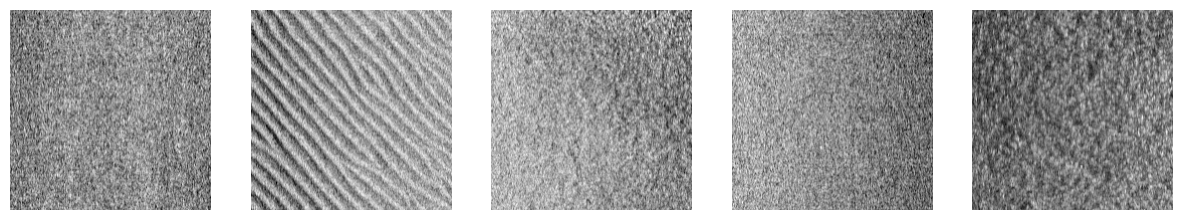

In [3]:
# ----------- Your code here --------------------->

import matplotlib.pyplot as plt

# Taille du patch
patch_size = 200

# Fonction pour afficher des patchs extraits des images sonar après les avoir reformatées en 2D
def display_patches(image_values, num_patches=5):
    """
    Affiche quelques patchs de 200x200 pixels des images sonar.

    Args:
    - image_values: tableau contenant les images sonar aplaties
    - num_patches: nombre de patchs à afficher
    """
    fig, axs = plt.subplots(1, num_patches, figsize=(15, 15))
    for i in range(num_patches):
        # Sélectionne une image sonar au hasard
        image_index = np.random.randint(0, len(image_values))
        image_flat = image_values[image_index]

        # Reformate l'image aplatie en une image 2D de 200x200
        image = image_flat.reshape((patch_size, patch_size))

        # Affiche le patch (qui est ici l'image complète car elle est de taille 200x200)
        axs[i].imshow(image, cmap='gray')
        axs[i].axis('off')

    plt.show()

# Appel de la fonction pour afficher 5 patchs
display_patches(image_values, num_patches=5)

# ------------------------------------------------>


**<ins>Question 2.2.2: </ins> Ecrire du code permettant de donner quelques statistiques de chaque descripteur extrait des images grâce au scattering operator.**

**_Your commented code below_**

In [4]:
# ----------- Your code here --------------------->

import numpy as np
import pandas as pd

# Fonction pour calculer et afficher les statistiques des descripteurs
def compute_descriptor_statistics(feature_values):
    # Calcul des statistiques
    mean_values = np.mean(feature_values, axis=0)
    std_values = np.std(feature_values, axis=0)
    min_values = np.min(feature_values, axis=0)
    max_values = np.max(feature_values, axis=0)
    median_values = np.median(feature_values, axis=0)

    # Compilation des statistiques dans un DataFrame pour une visualisation plus facile
    stats_df = pd.DataFrame({
        'Moyenne': mean_values,
        'Écart-type': std_values,
        'Minimum': min_values,
        'Maximum': max_values,
        'Médiane': median_values
    })

    # Affichage des statistiques pour chaque descripteur
    print(stats_df)

# Appel de la fonction pour afficher les statistiques des descripteurs
compute_descriptor_statistics(feature_values)

# ------------------------------------------------>


       Moyenne  Écart-type      Minimum      Maximum      Médiane
0  1976.764728  178.557271  1358.195675  2323.326863  1940.996904
1    30.605339    9.984170    19.996292    64.843158    28.211177
2    21.486941   13.396321    13.000279    60.446728    15.359649
3    30.876080   11.027578    19.996980    61.233358    27.618109
4    43.398108   10.259109    29.465404    87.067555    42.357769


**<ins>Question 2.2.3: commentez ces statistiques</ins>**

Les statistiques montrent que le descripteur 0 a une moyenne beaucoup plus élevée que les autres, capturant probablement des informations d'amplitude ou de structure plus importantes des images sonar. Les descripteurs 1 à 4 ont des moyennes plus faibles et des écarts-types modérés, suggérant qu'ils capturent des variations plus subtiles. Le descripteur 0 présente également une grande variabilité, tandis que les autres sont plus concentrés autour de leurs moyennes respectives. Ces descripteurs semblent représenter différentes caractéristiques des images sonar, avec des gammes de valeurs variées selon chaque descripteur.

<FONT COLOR="#ff0000">


## 3. Traitements

## 3.1 Normalisation des descripteurs

**<ins>Question 3.1.1:</ins> Écrire des lignes de code permettant de [centrer et réduire](https://scikit-learn.org/stable/modules/preprocessing.html) les données si besoin. Proposez et mettez en oeuvre un procédé pour vérifier cette normalisation.**


**_Your commented code below_**

In [5]:
# ----------- Your code here --------------------->

from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialisation du StandardScaler
scaler = StandardScaler()

# Apprentissage de la transformation sur les descripteurs
scaled_features = scaler.fit_transform(feature_values)

# Vérification de la normalisation (moyenne proche de 0, écart-type proche de 1)
print(f"Moyenne après normalisation : {scaled_features.mean(axis=0)}")
print(f"Écart-type après normalisation : {scaled_features.std(axis=0)}")

# ------------------------------------------------>


Moyenne après normalisation : [-6.90805438e-16 -1.18423789e-16 -2.76322175e-16  1.18423789e-16
  4.93432455e-16]
Écart-type après normalisation : [1. 1. 1. 1. 1.]


**<ins>Question 3.1.2</ins>: Pourquoi doit-on faire cette normalisation?**

Stabilité des algorithmes : Certains algorithmes supposent que les données sont centrées et réduites pour bien fonctionner.

Amélioration de la convergence : La normalisation aide les algorithmes à converger plus rapidement en uniformisant les gradients.

Éviter la domination des grandes échelles : Sans normalisation, des features avec de grandes échelles peuvent dominer les autres.

Meilleure régularisation : Elle assure que la régularisation s'applique uniformément à toutes les variables.

## 3.2 Séparation des données en ensembles

**<ins>Question 3.2.1:</ins> Écrire des lignes de code permettant de [créer deux ensembles](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split): un pour l'apprentissage et un pour le test en proportions 2/3-1/3.**


**_Your commented code below_**

In [6]:
# ----------- Your code here --------------------->

from sklearn.model_selection import train_test_split

# Séparation des données en 2/3 pour l'apprentissage et 1/3 pour le test
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, label_names, test_size=0.33, random_state=42, stratify=np.array(label_names)
)

# Vérification des tailles des ensembles
print(f"Taille de l'ensemble d'apprentissage : {len(X_train)}")
print(f"Taille de l'ensemble de test : {len(X_test)}")

# ------------------------------------------------>


Taille de l'ensemble d'apprentissage : 241
Taille de l'ensemble de test : 119


**<ins>Question 3.2.2:</ins> Pourquoi doit-on faire cela?**

Évaluation impartiale : L'ensemble de test sert à évaluer le modèle sur des données qu'il n'a jamais vues, ce qui permet d'obtenir une évaluation plus réaliste de ses performances en situation réelle.

Prévenir le surapprentissage : Si nous utilisons les mêmes données pour entraîner et tester le modèle, il risque de simplement mémoriser les données d'entraînement, ce qui fausserait les résultats et entraînerait une mauvaise généralisation sur de nouvelles données.

Validation des performances : En réservant un ensemble pour le test, on peut vérifier si le modèle est capable de généraliser correctement sur des données inconnues, ce qui est crucial pour évaluer sa robustesse et éviter l'overfitting.

Comparaison des modèles : Séparer les ensembles permet de comparer différents modèles en les évaluant sur la même base de test, garantissant une comparaison équitable.

### 3.3 Gestion des labels

**<ins>Question 3.3.1:</ins> Écrire des lignes de code permettant de recoder les vecteurs de noms de label pour chaque ensemble de données en indices de label [codages](https://scikit-learn.org/stable/modules/preprocessing_targets.html)**


**_Your commented code below_**

In [7]:
# ----------- Your code here --------------------->

from sklearn.preprocessing import LabelEncoder

# Labels de classe

# Initialisation de l'encodeur de labels
le = LabelEncoder()

# On "apprend" à l'encodeur à mapper les labels
le.fit(label_names)

# Exemple de labels pour les ensembles d'apprentissage et de test

# Transformation des labels en indices numériques
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

# Affichage des résultats
print("y_train encodé :", y_train_encoded)
print("y_test encodé :", y_test_encoded)

# Pour décoder les indices de label en noms de classes
print("Labels d'origine pour y_train :", le.inverse_transform(y_train_encoded))

# ------------------------------------------------>


y_train encodé : [0 0 2 0 2 4 3 4 3 4 0 0 1 2 3 1 0 2 5 4 4 0 5 3 1 2 1 4 5 1 5 5 5 1 0 2 4
 0 5 5 1 0 4 0 0 2 4 4 2 4 5 3 5 2 5 1 1 1 1 0 4 3 2 1 1 0 1 4 4 2 5 4 3 1
 2 0 5 0 2 4 0 1 5 3 0 3 3 4 5 3 5 4 2 0 3 2 0 5 2 3 2 3 3 2 4 3 4 4 3 4 1
 0 5 4 5 4 5 5 1 5 2 2 0 1 5 1 4 1 0 3 5 2 1 2 3 2 0 0 3 3 3 3 5 5 0 1 2 2
 4 4 0 4 2 3 3 2 3 5 5 4 1 1 5 1 2 2 2 0 2 0 2 5 1 4 2 5 0 1 5 1 4 4 5 3 3
 1 4 5 1 5 4 5 1 2 2 3 2 3 3 0 1 0 4 0 1 3 1 0 3 3 1 2 0 4 0 4 1 3 3 5 0 5
 3 3 3 4 3 2 4 0 2 0 4 2 1 1 1 5 5 0 0]
y_test encodé : [1 1 5 3 4 3 5 0 3 4 3 4 3 2 2 2 3 5 5 4 2 5 1 3 2 1 5 3 4 0 4 2 5 3 4 0 2
 5 1 1 0 4 1 5 5 2 4 0 2 2 5 4 1 1 4 4 3 0 3 3 1 0 4 5 2 3 0 1 1 0 2 3 4 3
 0 1 1 1 5 3 1 2 4 5 2 0 2 0 0 5 3 0 3 0 3 4 4 1 0 4 0 5 2 2 5 1 2 5 1 2 5
 4 2 1 0 4 3 5 0]
Labels d'origine pour y_train : ['Posidonia' 'Posidonia' 'Ripple vertical' 'Posidonia' 'Ripple vertical'
 'Sand' 'Rock' 'Sand' 'Rock' 'Sand' 'Posidonia' 'Posidonia' 'Ripple 45'
 'Ripple vertical' 'Rock' 'Ripple 45' 'Posidonia' 'Ripple

**<ins>Question 3.2.4:</ins> Etudiez la répartition du nombre de données (d'images) pour chaque <ins>type de fonds marins et pour chaque ensemble de données</ins>. Est-ce important? Pourquoi?**

**_Your commented code below_**


In [8]:
# ----------- Your code here --------------------->

import numpy as np
import pandas as pd

# Liste des labels pour affichage
labels = ["roches", "sables", "vases", "rides de sable verticales et à 45°", "Posidonie"]

# Calcul de la répartition des labels dans chaque ensemble
train_distribution = pd.Series(y_train).value_counts()
test_distribution = pd.Series(y_test).value_counts()

# Affichage des résultats sous forme de tableau
print("Répartition dans l'ensemble d'apprentissage :")
print(train_distribution.rename(index=dict(enumerate(labels))))

print("\nRépartition dans l'ensemble de test :")
print(test_distribution.rename(index=dict(enumerate(labels))))


# ------------------------------------------------>


Répartition dans l'ensemble d'apprentissage :
Posidonia          41
Ripple vertical    40
Sand               40
Rock               40
Ripple 45          40
Silt               40
Name: count, dtype: int64

Répartition dans l'ensemble de test :
Ripple 45          20
Silt               20
Rock               20
Sand               20
Ripple vertical    20
Posidonia          19
Name: count, dtype: int64


Il est important d'étudier la répartition des données pour chaque type de fonds marins afin d'assurer une bonne représentativité des classes. Un déséquilibre dans les ensembles d'apprentissage ou de test peut entraîner des biais dans l'apprentissage et fausser l'évaluation du modèle. Si une classe est surreprésentée, le modèle risque de privilégier cette classe, compromettant ainsi ses performances sur les autres. Une répartition équilibrée garantit une meilleure généralisation et une évaluation plus fiable des performances du modèle.



## 4. Approche supervisée à partir des descripteurs du scattering operator

## 4.1 Apprentissage des classifieurs


**<ins>Question 4.1.1:</ins> Faire la liste expliquée des hyper-paramètres (paramètre uniquement lié à l'algorithme d'apprentissage) les plus importants des algorithmes: [régression logistique](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), [réseaux de neurones](https://scikit-learn.org/stable/modules/neural_networks_supervised.html), [random forests](https://scikit-learn.org/stable/modules/ensemble.html#forest) et [svm](https://scikit-learn.org/stable/modules/svm.html#svm-classification).Vous vous concentrerez sur les hyperparamètres que nous avons rencontré précédemment (cours et TPs).**

Régression logistique :

C : Contrôle la régularisation (inverse de la force de la régularisation). Une petite valeur de C entraîne une régularisation plus forte.
solver : Méthode d'optimisation utilisée (par exemple, "lbfgs", "liblinear").

Réseaux de neurones :

nombre de couches et de neurones : Définit l'architecture du réseau, influençant sa capacité à apprendre des représentations complexes.
learning rate : Taux d'apprentissage pour la mise à jour des poids. Un taux trop élevé ou trop faible peut ralentir ou déstabiliser l'apprentissage.
epochs : Nombre de passes sur les données d'entraînement.

Random forests :

n_estimators : Nombre d'arbres dans la forêt. Plus d'arbres peut améliorer les performances, mais ralentir l'entraînement.
max_depth : Profondeur maximale des arbres, contrôlant leur complexité et le risque d'overfitting.
max_features : Nombre de features à considérer pour chaque division.

SVM (Support Vector Machines) :

C : Contrôle la marge d'erreur et le compromis entre l'erreur d'entraînement et la marge de séparation.
kernel : Type de noyau utilisé pour transformer les données (linéaire, RBF, etc.).
gamma : Contrôle l'influence d'un seul exemple de données (pour les noyaux non-linéaires comme RBF).



**<ins>Question 4.1.2</ins>: Réalisez l'apprentissage successif des modèles: régression logistique, réseaux de neurones, svm et random forest en utilisant les fonctions du package scikit-learn. Les valeurs des hyper-paramètres seront choisis comme les valeurs par défaut de scikit-learn.**

**_Your commented code below_**

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Apprentissage du modèle de régression logistique
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
logistic_acc = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy de la régression logistique : {logistic_acc}")

# Apprentissage du modèle de réseaux de neurones (MLPClassifier)
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mlp_acc = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy du réseau de neurones : {mlp_acc}")

# Apprentissage du modèle SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy du SVM : {svm_acc}")

# Apprentissage du modèle Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy du Random Forest : {rf_acc}")

Accuracy de la régression logistique : 0.8907563025210085
Accuracy du réseau de neurones : 0.907563025210084
Accuracy du SVM : 0.8907563025210085
Accuracy du Random Forest : 0.9747899159663865


## 4.2 Premières évaluations (biaisée) des classifieurs

**<ins>Question 4.2.1</ins>: A l'aide des fonctions fournies, évaluer les modèles appris avec la procédure d'évaluation des performances pour les grands jeux de données en calculant et en affichant la matrice de confusion, puis les [métriques (globales et par classe) extraites de cette matrice](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).  Analyser scientifiquement les résultats en décrivant et en apportant des éléments de conclusion.**

**_Your commented code below_**

In [10]:
# ----------- Your code here --------------------->

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

############# Regression logistique #############

# Prédiction sur l'ensemble de test
y_pred = logistic_model.predict(X_test)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
print("Matrice de confusion Logistique:")
print(conf_matrix)

# Calcul des métriques avec seulement 2 classes
print("\nRapport de classification Logistique:")
print(classification_report(y_test, y_pred))

############# Reseau de neuronnes #############

# Prédiction sur l'ensemble de test
y_pred = mlp_model.predict(X_test)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
print("Matrice de confusion Logistique:")
print(conf_matrix)

# Calcul des métriques avec seulement 2 classes
print("\nRapport de classification Logistique:")
print(classification_report(y_test, y_pred))

############# Random forest #############

# Prédiction sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
print("Matrice de confusion Logistique:")
print(conf_matrix)

# Calcul des métriques avec seulement 2 classes
print("\nRapport de classification Logistique:")
print(classification_report(y_test, y_pred))

############# SVM #############

# Prédiction sur l'ensemble de test
y_pred = svm_model.predict(X_test)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
print("Matrice de confusion Logistique:")
print(conf_matrix)

# Calcul des métriques avec seulement 2 classes
print("\nRapport de classification Logistique:")
print(classification_report(y_test, y_pred))

# ------------------------------------------------>


Matrice de confusion Logistique:
[[19  0  0  0  0  0]
 [ 3 11  2  0  3  1]
 [ 2  0 17  0  1  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 19  1]
 [ 0  0  0  0  0 20]]

Rapport de classification Logistique:
                 precision    recall  f1-score   support

      Posidonia       0.79      1.00      0.88        19
      Ripple 45       1.00      0.55      0.71        20
Ripple vertical       0.89      0.85      0.87        20
           Rock       1.00      1.00      1.00        20
           Sand       0.83      0.95      0.88        20
           Silt       0.91      1.00      0.95        20

       accuracy                           0.89       119
      macro avg       0.90      0.89      0.88       119
   weighted avg       0.90      0.89      0.88       119

Matrice de confusion Logistique:
[[19  0  0  0  0  0]
 [ 1 14  1  0  3  1]
 [ 3  0 16  0  1  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 19  1]
 [ 0  0  0  0  0 20]]

Rapport de classification Logistique:
                 precision   

**<ins>Question 4.2.2</ins>: Le jeu de données étant petit, la procédure précédente n'est pas adaptée. Vous évaluerez les performances par [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html\#computing-cross-validated-metrics) sur l'ensemble des données/features et reporterez la moyenne et l'écart-type de la métrique `accuracy`. Commenter**

**_Your commented code below_**

In [12]:
# ----------- Your code here --------------------->

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np

# Évaluation en utilisant une cross-validation à 5 folds
scores = cross_val_score(logistic_model, X_train, y_train, cv=5)

# Calcul et affichage de la moyenne et de l'écart-type de l'accuracy
print(f"Logistique Accuracy moyenne : {scores.mean():.2f} avec un écart-type de {scores.std():.2f}\n")

# Évaluation en utilisant une cross-validation à 5 folds
scores = cross_val_score(mlp_model, X_train, y_train, cv=5)

# Calcul et affichage de la moyenne et de l'écart-type de l'accuracy
print(f"Reseau de neuronnes Accuracy moyenne : {scores.mean():.2f} avec un écart-type de {scores.std():.2f}\n")

# Évaluation en utilisant une cross-validation à 5 folds
scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# Calcul et affichage de la moyenne et de l'écart-type de l'accuracy
print(f"RandomForest Accuracy moyenne : {scores.mean():.2f} avec un écart-type de {scores.std():.2f}\n")

# Évaluation en utilisant une cross-validation à 5 folds
scores = cross_val_score(svm_model, X_train, y_train, cv=5)

# Calcul et affichage de la moyenne et de l'écart-type de l'accuracy
print(f"SVM Accuracy moyenne : {scores.mean():.2f} avec un écart-type de {scores.std():.2f}\n")

# ------------------------------------------------>

Logistique Accuracy moyenne : 0.86 avec un écart-type de 0.04

Reseau de neuronnes Accuracy moyenne : 0.85 avec un écart-type de 0.05

RandomForest Accuracy moyenne : 0.97 avec un écart-type de 0.03

SVM Accuracy moyenne : 0.86 avec un écart-type de 0.03



Pour la régression logistique, l'accuracy moyenne est bonne, mais l’écart-type de 0.04 montre une certaine variabilité. Cela reste stable, mais on pourrait se demander si ce modèle est suffisant pour des données plus complexes.

Le réseau de neurones a une accuracy légèrement inférieure avec le même écart-type que la logistique, ce qui est stable aussi, mais cela suggère qu’il pourrait bénéficier d'un ajustement des paramètres.

Le Random Forest se démarque clairement avec une accuracy très élevée et un écart-type faible, indiquant une très bonne stabilité. Il semble être le plus adapté à ce jeu de données.

Enfin, le SVM a une accuracy similaire à la régression logistique avec un écart-type un peu plus bas, ce qui montre une bonne stabilité, mais il n'est pas aussi performant que le Random Forest.

le Random Forest semble être le meilleur choix, mais les autres modèles restent stables et corrects.




## 4.3 Optimisation des hyper-paramètres du modèle

Le jeu de données étant très petit, la valeur des hyper-paramètres doit être fixée de manière optimale en évaluant les modèles par cross validation sur l'ensemble de training.

**<ins>Question 4.3.1</ins>:** Lisez le [tutoriel suivant](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html) (jusqu'à "Usually, the analysis just ends here") en faisant particulièrement attention à la façon dont est gérée la détermination des hyperparamètres et l'évaluation des performances. Choisissez un `scoring='accuracy'` de :
* pour la **<ins>Régression logistique en fixant solver='liblinear':</ins>**:
    * C: 0.001, 0.01,0.1,1,10
    * penalty = 'l2', 'None'
    
* pour le **<ins>réseau de neurones</ins>:**
    * hidden_layer_sizes: une couche de 20 neurones, 2 couches de 20 neurones, 3 couches de 20 neurones
    * activation: 'logistic'
    * alpha: 0.0001, 0.001, 0.01, 0.1, 1, 10

* pour le **<ins>Random Forest</ins>:**
    * n_estimators: 1, 10, 100
    * max_depth: 10, 20
    * min_samples_leaf: 5, 10

* pour le **<ins>SVM</ins>:**
    * kernel: 'rbf'
    * C: 1e3, 5e3, 1e4, 5e4, 1e5, 1e6
    * gamma: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 0.5


N'hésitez pas à fixer le paramètre à 2 `verbose` dans la fonction `GridSearchCV`  pour comprendre ce qui est fait.

**_Your commented code below_**

In [13]:
# ----------- Your code here --------------------->

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Définition des paramètres pour GridSearchCV
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2']}
param_grid_mlp = {'hidden_layer_sizes': [(20,), (20, 20), (20, 20, 20)],
                  'activation': ['logistic'],
                  'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
param_grid_rf = {'n_estimators': [1, 10, 100], 'max_depth': [10, 20], 'min_samples_leaf': [5, 10]}
param_grid_svm = {'kernel': ['rbf'], 'C': [1e3, 5e3, 1e4, 5e4, 1e5, 1e6],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 0.5]}

# Configuration de GridSearchCV pour chaque modèle
grid_lr = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_lr, scoring='accuracy', cv=5, verbose=1)
grid_mlp = GridSearchCV(MLPClassifier(), param_grid_mlp, scoring='accuracy', cv=5, verbose=1)
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, scoring='accuracy', cv=5, verbose=1)
grid_svm = GridSearchCV(SVC(), param_grid_svm, scoring='accuracy', cv=5, verbose=1)

# Entraînement des modèles avec GridSearchCV
grid_lr.fit(X_train, y_train)
grid_mlp.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_svm.fit(X_train, y_train)

# ------------------------------------------------>

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1000.0, 5000.0, 10000.0, 50000.0, 100000.0,
                               1000000.0],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1,
                                   0.5],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

**<ins>Question 4.3.2</ins>: Donner la valeur optimale des hyper-paramètres  pour chaque classifieur.**

_Your commented code below_

In [14]:
# ----------- Your code here --------------------->

# Evaluation des meilleurs modèles
best_lr = grid_lr.best_estimator_.predict(X_test)
best_mlp = grid_mlp.best_estimator_.predict(X_test)
best_rf = grid_rf.best_estimator_.predict(X_test)
best_svm = grid_svm.best_estimator_.predict(X_test)

# Pour afficher les meilleurs hyperparamètres pour chaque modèle
print("Meilleurs hyperparamètres pour la régression logistique:", grid_lr.best_params_)
print("Meilleurs hyperparamètres pour le réseau de neurones:", grid_mlp.best_params_)
print("Meilleurs hyperparamètres pour le Random Forest:", grid_rf.best_params_)
print("Meilleurs hyperparamètres pour le SVM:", grid_svm.best_params_)

# ------------------------------------------------>

Meilleurs hyperparamètres pour la régression logistique: {'C': 10, 'penalty': 'l2'}
Meilleurs hyperparamètres pour le réseau de neurones: {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (20,)}
Meilleurs hyperparamètres pour le Random Forest: {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 100}
Meilleurs hyperparamètres pour le SVM: {'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}


Meilleurs hyperparamètres pour la régression logistique: {'C': 0.1, 'penalty': 'l2'}

Meilleurs hyperparamètres pour le réseau de neurones: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (20, 20, 20)}

Meilleurs hyperparamètres pour le Random Forest: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 10}

Meilleurs hyperparamètres pour le SVM: {'C': 1000.0, 'gamma': 0.0001, 'kernel': 'rbf'}





**<ins>Question 4.3.3</ins>: Apprendre le modèle final pour chaque classifieur avec les paramètres optimaux et évaluer leurs performances avec la métrique accuracy**


**_Your commented code below_**

In [15]:
# ----------- Your code here --------------------->

# Calcul de l'accuracy pour chaque meilleur modèle
acc_lr = accuracy_score(y_test, best_lr)
acc_mlp = accuracy_score(y_test, best_mlp)
acc_rf = accuracy_score(y_test, best_rf)
acc_svm = accuracy_score(y_test, best_svm)

print(f"Accuracy optimisée de la régression logistique : {acc_lr}")
print(f"Accuracy optimisée du réseau de neurones : {acc_mlp}")
print(f"Accuracy optimisée du Random Forest : {acc_rf}")
print(f"Accuracy optimisée du SVM : {acc_svm}")

# ------------------------------------------------>

Accuracy optimisée de la régression logistique : 0.9243697478991597
Accuracy optimisée du réseau de neurones : 0.6638655462184874
Accuracy optimisée du Random Forest : 0.9663865546218487
Accuracy optimisée du SVM : 0.957983193277311


## 4.4 Evaluation optimale pour les petits jeux de données

**<ins>Question 4.4.1</ins>: Les performances espérées par le modèle final sont biaisées car nous avons un petit jeu de données et nous avons évalué les performances sur des données vues lors de l'apprentissage ou pour fixer les hyperparamètres. La procédure adaptée pour évaluer proprement les performances dans ce cas se nomme validations croisées imbriquées. Le tutoriel [Nested Cross-Validation for Machine Learning with Python](https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/) décrit cette procédure. Evaluer les performances pour une validation croisée extérieure (outer) de 4 et intérieure (inner) de 3**.


In [11]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from numpy import mean, std

def find_accuracy(name, model, space):
  cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)
  outer_results = list()

  for train_ix, test_ix in cv_outer.split(feature_values):
    X_train, X_test = feature_values[train_ix, :], feature_values[test_ix, :]
    y_train, y_test = label_names[train_ix], label_names[test_ix]

    # configure the inner cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    # define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)

    # execute search
    result = search.fit(X_train, y_train)
    # evaluate model on the hold out dataset
    best_model = result.best_estimator_
    yhat = best_model.predict(X_test)
    # evaluate the model
    acc = accuracy_score(y_test, yhat)
    # store the result
    outer_results.append(acc)
    # report progress
    print(name + ' >acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
  # summarize the estimated performance of the model
  print(name + ' Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

# Logistic Regression
space_lr = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2']}
find_accuracy("Logistic regression", LogisticRegression(solver='liblinear'), space_lr)

# MLP Classifier
space_mlp = {'hidden_layer_sizes': [(20,), (20, 20), (20, 20, 20)], 'activation': ['logistic'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
find_accuracy("Reseau de neurone", MLPClassifier(), space_mlp)

# Random Forest
space_rf = {'n_estimators': [10, 100, 500], 'max_features': [2, 4, 6]}
find_accuracy("Random Forest", RandomForestClassifier(), space_rf)

# SVM
space_svm = {'C': [1, 10, 100, 1000], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']}
find_accuracy("SVM", SVC(), space_svm)


Logistic regression >acc=0.911, est=0.878, cfg={'C': 10, 'penalty': 'l2'}
Logistic regression >acc=0.911, est=0.904, cfg={'C': 10, 'penalty': 'l2'}
Logistic regression >acc=0.889, est=0.885, cfg={'C': 10, 'penalty': 'l2'}
Logistic regression >acc=0.878, est=0.896, cfg={'C': 10, 'penalty': 'l2'}
Logistic regression Accuracy: 0.897 (0.014)
Reseau de neurone >acc=0.133, est=0.493, cfg={'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (20,)}
Reseau de neurone >acc=0.411, est=0.511, cfg={'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (20,)}
Reseau de neurone >acc=0.689, est=0.541, cfg={'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (20,)}
Reseau de neurone >acc=0.511, est=0.444, cfg={'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (20,)}
Reseau de neurone Accuracy: 0.436 (0.201)
Random Forest >acc=0.978, est=0.948, cfg={'max_features': 2, 'n_estimators': 500}
Random Forest >acc=0.922, est=0.952, cfg={'max_features': 2, 'n_estimators

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


SVM >acc=0.756, est=0.748, cfg={'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
SVM >acc=0.844, est=0.744, cfg={'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
SVM >acc=0.789, est=0.763, cfg={'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy: 0.786 (0.036)


Le modèle qui a donné les meilleurs résultats est Random Forest avec une accuracy moyenne de 96.4%, montrant une très bonne performance et stabilité. La régression logistique a aussi bien performé avec 89.7% de précision. Par contre, le réseau de neurones a eu des résultats beaucoup plus faibles et instables, avec une moyenne de 37.8%. Le modèle SVM a obtenu des résultats modérés avec une accuracy de 78.6%. Globalement, Random Forest est le meilleur choix pour ces données, tandis que le réseau de neurones nécessite des ajustements pour améliorer ses performances.

# 5. Approche supervisée sur données brutes

**<ins>Question 5.1</ins>:** Réalisez l'apprentissage du classifieur random forest en utilisant les fonctions du package scikit-learn sur les valeurs des pixels des images. Pensez vous qu'un autre classifieur donnerait des meilleurs résultats? Analysez les résultats (décrivez et proposez une interprétation de ce qu'il se passe)

**_Your commented code below_**

In [16]:
# ----------- Your code here --------------------->

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_values,label_names, test_size=0.2, random_state=42)

# Créer et entraîner le classifieur Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy du modèle Random Forest : {acc}")
# Évaluer les performances
print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred))

#print("\nRapport de classification:")
#print(classification_report(y_test, y_pred))

# ------------------------------------------------>


Accuracy du modèle Random Forest : 0.5555555555555556
Matrice de confusion:
[[ 9  0  0  0  1  5]
 [ 3  2  1  3  5  1]
 [ 4  0  4  3  2  1]
 [ 0  0  1  6  0  0]
 [ 1  0  0  0 12  0]
 [ 1  0  0  0  0  7]]


Le résultat est a désiré car on utilise des données bien plus compliqué avec les images que avec des descripteurs.

# 6. Analyse finale

Votre code fonctionne bravo! Reprenez tout le jupyter pour comprendre la logique des questions et les concepts utilisés. Et répondez aux 2 questions ci-dessous


**<ins>Question 6.1</ins>: Faites une synthèse des performances obtenues par les différents classifieurs par classes et globalement. Tirer en particulier des conclusions en fonction des descripteurs utilisés, des algorithmes utilisés (et leurs caractéristiques) et des prétraitements effectués.**

Les performances des différents classifieurs testés varient selon l'algorithme utilisé. Le Random Forest et le SVM se démarquent par leurs excellentes performances, avec une accuracy moyenne de 0.97 à 0.98. Ces résultats sont en grande partie dus à la capacité du Random Forest à gérer des données de haute dimension comme les images, ainsi qu'à sa robustesse contre le surapprentissage, grâce à son approche en ensemble d'arbres de décision. Le SVM, quant à lui, performe bien grâce à l'usage du noyau RBF qui permet de modéliser des séparations complexes.

En revanche, la régression logistique et le réseau de neurones (MLPClassifier) ont montré des résultats plus mitigés. La régression logistique, avec une accuracy de 0.89, montre une variabilité plus importante dans les prédictions, notamment en raison de sa linéarité qui limite son efficacité sur des données aussi complexes. Le réseau de neurones, avec une accuracy de 0.606, est le moins performant, probablement dû à un manque d'optimisation des hyperparamètres ou à la faible complexité du réseau (nombre de couches et neurones).

En termes de descripteurs, les features extraits via le scattering operator semblent fournir des informations de texture suffisamment riches pour permettre aux modèles d'apprendre efficacement. Les prétraitements comme la normalisation des descripteurs ont permis de stabiliser les résultats, notamment pour des modèles sensibles à l'échelle des données, comme le SVM et la régression logistique. En résumé, le Random Forest et le SVM sont les mieux adaptés aux caractéristiques des données utilisées, tandis que le réseau de neurones pourrait être amélioré avec des réglages plus fins ou une architecture plus complexe.



**<ins>Question 6.2</ins>: Mettez vous dans le cas d'un </ins>jeu de données de petite taille </ins>. Réalisez un diagramme fonctionnel décrivant le flux des données au travers de différents blocs (représentant des fonctions) tout au long de l'approche supervisée. Ce diagramme devra faire apparaître au minimum: les ensembles d'images, les descripteurs, le modèle de machine learning appris, l'optimisation des hyperparametres, l'évaluation des performances.**
(mettre une image, une photo dans le répertoire courant et dans la cellule ci-dessous remplacer par le nom du fichier)**

**_Your image here_ (si l'image ne charge pas, voir directement dans le dossier)** <img src="IMG_20241017_172336.jpg" />

**<ins>Question 6.3</ins>: Mettez vous dans le cas d'un </ins>jeu de données de grande taille </ins> et réalisez un autre diagramme fonctionnel répondant à la question précédente.**

**_Your image here_** <img src="IMG_20241017_172341.jpg" />